In [6]:
import requests
from bs4 import BeautifulSoup

def scrape_quotes(base_url="http://quotes.toscrape.com", pages=3):
    all_quotes = []

    for page_num in range(1, pages + 1):
        url = f"{base_url}/page/{page_num}/"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        quotes = soup.find_all('span', class_='text')
        for quote in quotes:
            all_quotes.append(quote.text.strip())

    return all_quotes

quotes = scrape_quotes(pages=3)
print(f"Scraped {len(quotes)} quotes.")


Scraped 30 quotes.


In [7]:
import re

def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text).strip().lower()

cleaned_quotes = [clean_text(q) for q in quotes]


In [8]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

sentiments = [get_sentiment(q) for q in cleaned_quotes]


In [9]:
import pandas as pd

df = pd.DataFrame({
    'Quote': quotes,
    'Cleaned': cleaned_quotes,
    'Sentiment': sentiments
})

df.to_csv("quotes_sentiment.csv", index=False)
df.head()


,Quote,Cleaned,Sentiment
0,“The world as we have created it is a process ...,the world as we have created it is a process o...,0.000000
1,"“It is our choices, Harry, that show what we t...",it is our choices harry that show what we trul...,0.300000
2,“There are only two ways to live your life. On...,there are only two ways to live your life one ...,0.003788
3,"“The person, be it gentleman or lady, who has ...",the person be it gentleman or lady who has not...,-0.050000
4,"“Imperfection is beauty, madness is genius and...",imperfection is beauty madness is genius and i...,-0.277778


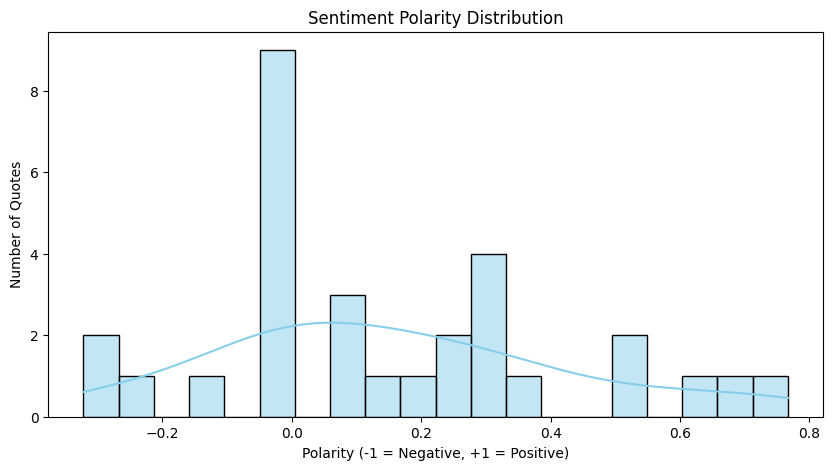

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(sentiments, bins=20, kde=True, color='skyblue')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity (-1 = Negative, +1 = Positive)")
plt.ylabel("Number of Quotes")
plt.show()


In [14]:
from textblob import TextBlob

# ✅ Sample input
text = "I absolutely love this product! It works like a charm."

# Clean (optional, if scraped)
cleaned_text = text.lower().strip()

# Sentiment analysis
blob = TextBlob(cleaned_text)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity



# Classify as positive, neutral, or negative
if polarity > 0.1:
    print(" Sentiment: Positive")
elif polarity < -0.1:
    print("sentiment: Negative")
else:
    print("Sentiment: Neutral")


 Sentiment: Positive
